In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("homeprices.csv")

In [4]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [5]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values
x1=df.iloc[:,:-1].values
y1=df.iloc[:,-1:].values


In [6]:
x1

array([['monroe township', 2600],
       ['monroe township', 3000],
       ['monroe township', 3200],
       ['monroe township', 3600],
       ['monroe township', 4000],
       ['west windsor', 2600],
       ['west windsor', 2800],
       ['west windsor', 3300],
       ['west windsor', 3600],
       ['robinsville', 2600],
       ['robinsville', 2900],
       ['robinsville', 3100],
       ['robinsville', 3600]], dtype=object)

<h2>One Hot Encoding</h2>

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [31]:
ct=ColumnTransformer(transformers=[('encoding',OneHotEncoder(),[0])],remainder='passthrough')

In [32]:
x=ct.fit_transform(x)

In [33]:
x

array([[1.0, 0.0, 0.0, 2600],
       [1.0, 0.0, 0.0, 3000],
       [1.0, 0.0, 0.0, 3200],
       [1.0, 0.0, 0.0, 3600],
       [1.0, 0.0, 0.0, 4000],
       [0.0, 0.0, 1.0, 2600],
       [0.0, 0.0, 1.0, 2800],
       [0.0, 0.0, 1.0, 3300],
       [0.0, 0.0, 1.0, 3600],
       [0.0, 1.0, 0.0, 2600],
       [0.0, 1.0, 0.0, 2900],
       [0.0, 1.0, 0.0, 3100],
       [0.0, 1.0, 0.0, 3600]], dtype=object)

In [27]:
y

array([[550000],
       [565000],
       [610000],
       [680000],
       [725000],
       [585000],
       [615000],
       [650000],
       [710000],
       [575000],
       [600000],
       [620000],
       [695000]], dtype=int64)

# Another way of getting dummy variables

<h2 style='color:purple'>Using pandas to create dummy variables</h2>

In [9]:
dumps=pd.get_dummies(df['town'])

In [10]:
dumps

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [11]:
# omit one columm
dumps=dumps.iloc[:,:-1]

In [12]:
dumps

,monroe township,robinsville
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,1


**Using concat function to merge the dataframes**

In [13]:
import warnings
warnings.filterwarnings("ignore")
df1=pd.concat([df,dumps],axis='columns')

In [14]:
df1

,town,area,price,monroe township,robinsville
0,monroe township,2600,550000,1,0
1,monroe township,3000,565000,1,0
2,monroe township,3200,610000,1,0
3,monroe township,3600,680000,1,0
4,monroe township,4000,725000,1,0
5,west windsor,2600,585000,0,0
6,west windsor,2800,615000,0,0
7,west windsor,3300,650000,0,0
8,west windsor,3600,710000,0,0
9,robinsville,2600,575000,0,1


In [15]:
final=df1.drop(columns=['town'],axis=1)

In [16]:
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [17]:
X_new=final.drop(columns=['price'],axis=1)

In [18]:
X_new

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [19]:
Y_new=final['price']

In [20]:
Y_new

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

**Creating Linear Regression Model**

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_new,Y_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# 2800 sq ft home in robinsville
lr.predict([[2800,0,1]])

array([590775.63964739])

In [26]:
# 3400 sq ft home in WestWin3sor
lr.predict([[3400,0,0]])

array([681241.66845839])

<h2 style='color:purple'>Problem 2</h2>

**This file named carprices has car sell prices for 3 different models.**

Objective:

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Find score of model.

In [31]:
import seaborn as sns
car=pd.read_csv("carprices.csv")

In [32]:
car

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [33]:
car.columns=['CarModel', 'Mileage', 'SellPriceindollars', 'Age_in_yrs']

<h2 style='color:purple'>Mileage Vs Price</h2>

Text(0, 0.5, 'Price')

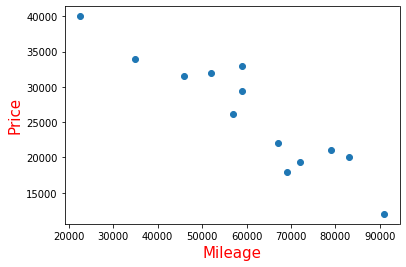

In [34]:
plt.scatter(x=car.Mileage,y=car.SellPriceindollars)
plt.xlabel("Mileage",fontsize=15,color='red')
plt.ylabel("Price",fontsize=15,color='red')

<h2 style='color:purple'>Age vs Price</h2>

Text(0, 0.5, 'Price')

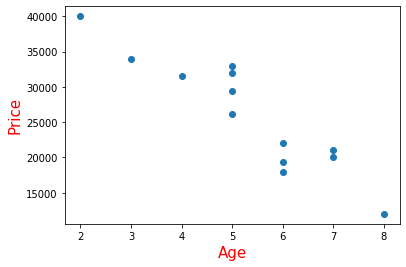

In [36]:
plt.scatter(x=car.Age_in_yrs,y=car.SellPriceindollars)
plt.xlabel("Age",fontsize=15,color='red')
plt.ylabel("Price",fontsize=15,color='red')

**Dummy Variables**

In [37]:
dumps=pd.get_dummies(car.CarModel)

In [38]:
dumps

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


**Merging**

In [39]:
final=pd.concat([dumps,car],axis=1)

In [40]:
final=final.drop(columns=["CarModel"])

In [41]:
final

,Audi A5,BMW X5,Mercedez Benz C class,Mileage,SellPriceindollars,Age_in_yrs
0,0,1,0,69000,18000,6
1,0,1,0,35000,34000,3
2,0,1,0,57000,26100,5
3,0,1,0,22500,40000,2
4,0,1,0,46000,31500,4
5,1,0,0,59000,29400,5
6,1,0,0,52000,32000,5
7,1,0,0,72000,19300,6
8,1,0,0,91000,12000,8
9,0,0,1,67000,22000,6


In [42]:
x=final.drop(columns=["SellPriceindollars","Mercedez Benz C class"])

In [43]:
x

,Audi A5,BMW X5,Mileage,Age_in_yrs
0,0,1,69000,6
1,0,1,35000,3
2,0,1,57000,5
3,0,1,22500,2
4,0,1,46000,4
5,1,0,59000,5
6,1,0,52000,5
7,1,0,72000,6
8,1,0,91000,8
9,0,0,67000,6


In [44]:
y=final.iloc[:,4:-1].values

In [45]:
y

array([[18000],
       [34000],
       [26100],
       [40000],
       [31500],
       [29400],
       [32000],
       [19300],
       [12000],
       [22000],
       [20000],
       [21000],
       [33000]], dtype=int64)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [51]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Price of mercedez benz that is 4 yr old with mileage 45000**

In [52]:
model.predict([[0,0,45000,4]])

array([[36991.31721062]])

**Price of BMW X5 that is 7 yr old with mileage 86000**

In [53]:
model.predict([[0,1,86000,7]])

array([[11080.74313218]])